# Black Friday Sales Analysis

# Research Questions:
## 1. Based on gender, which group shows the greatest value for purchase amount?
## 2. Which city category shows the greatest value for purchase amount?
## 3. Analyze the total sales based on customer’s occupation?
## 4. How does marital status compare with purchase amount?
## 5. For each product (1,2,3) which categories were the most popular?

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
black_friday_data_to_load = "BlackFriday.csv"

# Read Data File and store into Pandas Data Frames
black_friday_data = pd.read_csv(black_friday_data_to_load)
print(black_friday_data.shape)
black_friday_data.head()

(537577, 12)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [2]:
#cleaning data sorting with user_ID and dropping the row with purchase amount = 0 and rename the columns
black_friday_data = black_friday_data.sort_values('User_ID').reset_index(drop=True)
black_friday_data = black_friday_data[black_friday_data.Purchase != 0]
black_friday_data = black_friday_data.rename(columns = {'City_Category' : 'City', 'Purchase' : 'Purchase_Amount'})
black_friday_data.to_csv('BlackFridaySorted.csv')
black_friday_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00255842,F,0-17,10,A,2,0,16,NaN,NaN,16446
2,1000001,P0097142,F,0-17,10,A,2,0,12,NaN,NaN,1715
3,1000001,P00289942,F,0-17,10,A,2,0,3,4.0,5.0,10900
4,1000001,P00210342,F,0-17,10,A,2,0,3,4.0,NaN,11039


## 1. Based on gender, which group shows the greatest value for purchase amount?

In [3]:
# Calculating Difference between Male and Female shoppers
Male_count = black_friday_data[black_friday_data.Gender == 'M'].count()
Female_count = black_friday_data[black_friday_data.Gender == 'F'].count()
diff_count = Male_count['Gender'] - Female_count['Gender']
print(f'Difference between Male and Female count: {diff_count}')

Difference between Male and Female count: 273183


In [4]:
# Sorting data by gender
black_friday_gender = black_friday_data.groupby(['Gender', 'Age']).sum().reset_index()
black_friday_gender

,Gender,Age,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,F,0-17,4966338668,40926,0,25741,31284.0,17497.0,41826615
1,F,18-25,24127888192,143713,6117,128820,160125.0,84467.0,202209450
2,F,26-35,49504771336,320824,19959,275091,333616.0,166826.0,433857680
3,F,36-45,26503786817,204734,10115,148503,183192.0,96786.0,239010480
4,F,46-50,12897395014,80071,9797,74221,89296.0,45906.0,114796993
5,F,51-55,9662342908,65073,6150,56675,66414.0,31828.0,87972407
6,F,55+,4942649732,36020,3085,30650,35289.0,16579.0,44950396
7,M,0-17,9780021105,88352,0,46858,63151.0,39254.0,90832391
8,M,18-25,73776205588,514061,14524,359678,486554.0,298411.0,699459830
9,M,26-35,165845366407,1375730,64207,844965,1115822.0,666925.0,1565891426


### Sales analysis for Male gender

In [5]:
# Selecting Male data 
black_friday_male = black_friday_gender[black_friday_gender.Gender != 'F']
black_friday_male

,Gender,Age,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
7,M,0-17,9780021105,88352,0,46858,63151.0,39254.0,90832391
8,M,18-25,73776205588,514061,14524,359678,486554.0,298411.0,699459830
9,M,26-35,165845366407,1375730,64207,844965,1115822.0,666925.0,1565891426
10,M,36-45,81320940178,746326,32392,430660,555110.0,320902.0,771639085
11,M,46-50,31768969136,299574,22397,176442,220508.0,124034.0,298621230
12,M,51-55,28066639487,266323,20829,155854,197300.0,112598.0,273935949
13,M,55+,16022033582,163352,10188,92606,109749.0,59363.0,152664446


In [6]:
# Catagorize age column in Male dataset, and creating new dataframe
black_friday_male["Age"] = black_friday_male["Age"].astype('category')
black_friday_male["Age_labels"] = black_friday_male["Age"].cat.codes
black_friday_male_df = black_friday_male [['Gender', 'Age', 'Purchase_Amount', 'Age_labels']]
print(black_friday_male_df)
Total_male_revenue = black_friday_male_df['Purchase_Amount'].sum()
print(f'Total Male shoppers revenue: {Total_male_revenue}')

   Gender    Age  Purchase_Amount  Age_labels
7       M   0-17         90832391           0
8       M  18-25        699459830           1
9       M  26-35       1565891426           2
10      M  36-45        771639085           3
11      M  46-50        298621230           4
12      M  51-55        273935949           5
13      M    55+        152664446           6
Total Male shoppers revenue: 3853044357


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


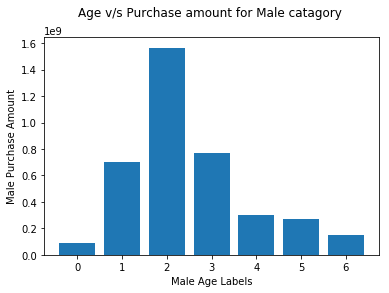

In [7]:
# Plotting male ages v/s purchase amount
plt.bar(black_friday_male_df['Age_labels'], black_friday_male_df['Purchase_Amount'])
plt.xlabel("Male Age Labels")
plt.ylabel("Male Purchase Amount")
plt.title("Age v/s Purchase amount for Male catagory \n")
plt.savefig('male_analysis.png')
plt.show()

### Sales analysis for Female gender

In [8]:
# Selecting Female data 
black_friday_female = black_friday_gender[black_friday_gender.Gender != 'M']
black_friday_female

,Gender,Age,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount
0,F,0-17,4966338668,40926,0,25741,31284.0,17497.0,41826615
1,F,18-25,24127888192,143713,6117,128820,160125.0,84467.0,202209450
2,F,26-35,49504771336,320824,19959,275091,333616.0,166826.0,433857680
3,F,36-45,26503786817,204734,10115,148503,183192.0,96786.0,239010480
4,F,46-50,12897395014,80071,9797,74221,89296.0,45906.0,114796993
5,F,51-55,9662342908,65073,6150,56675,66414.0,31828.0,87972407
6,F,55+,4942649732,36020,3085,30650,35289.0,16579.0,44950396


In [9]:
# Catagorize age column in Female dataset, and creating new dataframe
black_friday_female["Age"] = black_friday_female["Age"].astype('category')
black_friday_female["Age_labels"] = black_friday_female["Age"].cat.codes
black_friday_female_df = black_friday_female[['Gender', 'Age', 'Purchase_Amount', 'Age_labels']]
print(black_friday_female_df)
Total_female_revenue = black_friday_female_df['Purchase_Amount'].sum()
print(f'Total Female shoppers revenue: {Total_female_revenue}')

  Gender    Age  Purchase_Amount  Age_labels
0      F   0-17         41826615           0
1      F  18-25        202209450           1
2      F  26-35        433857680           2
3      F  36-45        239010480           3
4      F  46-50        114796993           4
5      F  51-55         87972407           5
6      F    55+         44950396           6
Total Female shoppers revenue: 1164624021


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


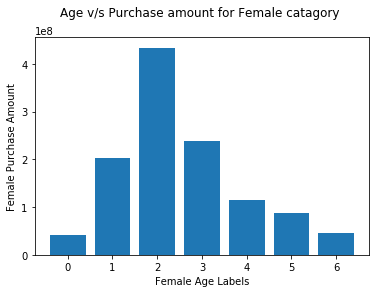

In [10]:
# Plotting Female ages v/s purchase amount
plt.bar(black_friday_female_df['Age_labels'], black_friday_female_df['Purchase_Amount'])
plt.xlabel("Female Age Labels")
plt.ylabel("Female Purchase Amount")
plt.title("Age v/s Purchase amount for Female catagory \n")
plt.savefig('female_analysis.png')
plt.show()

## 2. Which city category shows the greatest value for purchase amount?

In [11]:
# Adding city labels to city column and converting it to category
black_friday_data["City"] = black_friday_data["City"].astype('category')
black_friday_data["City_labels"] = black_friday_data["City"].cat.codes
black_friday_data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_Amount,City_labels
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,0
1,1000001,P00255842,F,0-17,10,A,2,0,16,NaN,NaN,16446,0
2,1000001,P0097142,F,0-17,10,A,2,0,12,NaN,NaN,1715,0
3,1000001,P00289942,F,0-17,10,A,2,0,3,4.0,5.0,10900,0
4,1000001,P00210342,F,0-17,10,A,2,0,3,4.0,NaN,11039,0
5,1000001,P00248442,F,0-17,10,A,2,0,3,4.0,NaN,7943,0
6,1000001,P00051442,F,0-17,10,A,2,0,8,17.0,NaN,9938,0
7,1000001,P00183942,F,0-17,10,A,2,0,3,4.0,NaN,10872,0
8,1000001,P00178342,F,0-17,10,A,2,0,8,NaN,NaN,7887,0
9,1000001,P00058142,F,0-17,10,A,2,0,3,4.0,12.0,11051,0


In [12]:
# Calculating total revenue per city
black_friday_city = black_friday_data.groupby(['City']).sum().reset_index()
black_friday_city_df = black_friday_city [['City', 'Purchase_Amount']]
city_type = black_friday_city_df['City']
city_revenue = black_friday_city_df['Purchase_Amount']
black_friday_city_df


,City,Purchase_Amount
0,A,1295668797
1,B,2083431612
2,C,1638567969


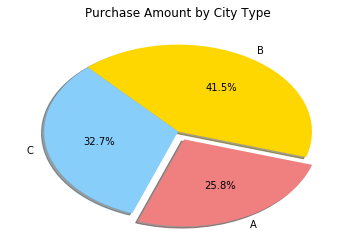

In [13]:
# Plotting city pie chart for city revenue
plt.title("Purchase Amount by City Type")
colors = ['lightcoral','gold', 'lightskyblue']
explode = (0.1, 0, 0)

plt.pie(city_revenue, explode=explode, labels=city_type, colors=colors,
      autopct="%1.1f%%", shadow=True, startangle=250)

plt.savefig('city_analysis.png')

plt.show()

## 3. Analyze the total sales based on customer’s occupation?

In [14]:
# Calculate total revenue per occupation
black_friday_occupation = black_friday_data.groupby(['Occupation']).sum().reset_index()
black_friday_occupation_df = black_friday_occupation[['Occupation', 'Purchase_Amount']]
black_friday_occupation_df

,Occupation,Purchase_Amount
0,0,625814811
1,1,414552829
2,2,233275393
3,3,160428450
4,4,657530393
5,5,112525355
6,6,185065697
7,7,549282744
8,8,14594599
9,9,53619309


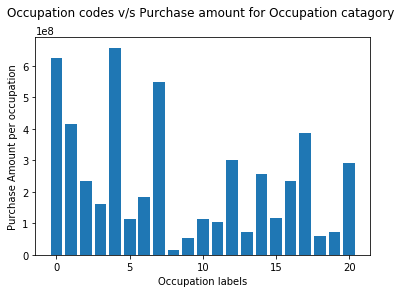

In [15]:
# Plotting bar graph Occupation codes v/s Purchase amount for Occupation catagory 
plt.bar(black_friday_occupation_df['Occupation'], black_friday_occupation_df['Purchase_Amount'])
plt.xlabel("Occupation labels")
plt.ylabel("Purchase Amount per occupation")
plt.title("Occupation codes v/s Purchase amount for Occupation catagory \n")
plt.savefig('occupation_analysis.png')
plt.show()


## 4. How does marital status compare with purchase amount?

In [16]:
# Dataframe for total revenue per marital status
black_friday_marital = black_friday_data.groupby(['Marital_Status']).sum().reset_index()
black_friday_marital_status = black_friday_marital['Marital_Status']
black_friday_marital_amount = black_friday_marital['Purchase_Amount']
black_friday_marital_amount

0    2966289500
1    2051378878
Name: Purchase_Amount, dtype: int64

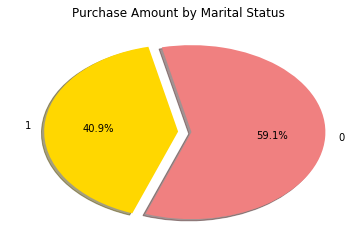

In [17]:
# Plotting pie graph Marital status codes v/s Purchase amount
plt.title("Purchase Amount by Marital Status")
colors = ['lightcoral','gold']
explode = (0.1, 0.0)

plt.pie(black_friday_marital_amount, explode=explode, labels=black_friday_marital_status, colors=colors,
      autopct="%1.1f%%", shadow=True, startangle=250)

plt.savefig('marital_analysis.png')
plt.show()

# Product catagory analysis:
## Product catagory 1 analysis, to see which item in catagory 1 is more popular

In [18]:
# Calculating Product catagory 1 count per item code
black_friday_cat1_count = black_friday_data.dropna(subset=['Product_Category_1'])
black_friday_cat1_count = black_friday_cat1_count['Product_Category_1'].value_counts()
black_friday_cat1_sorted = black_friday_cat1_count.sort_index().reset_index()
print(black_friday_cat1_sorted)
prod_cat1_list = black_friday_cat1_sorted['index']
prod_cat1_count = black_friday_cat1_sorted['Product_Category_1']

    index  Product_Category_1
0       1              138353
1       2               23499
2       3               19849
3       4               11567
4       5              148592
5       6               20164
6       7                3668
7       8              112132
8       9                 404
9      10                5032
10     11               23960
11     12                3875
12     13                5440
13     14                1500
14     15                6203
15     16                9697
16     17                 567
17     18                3075


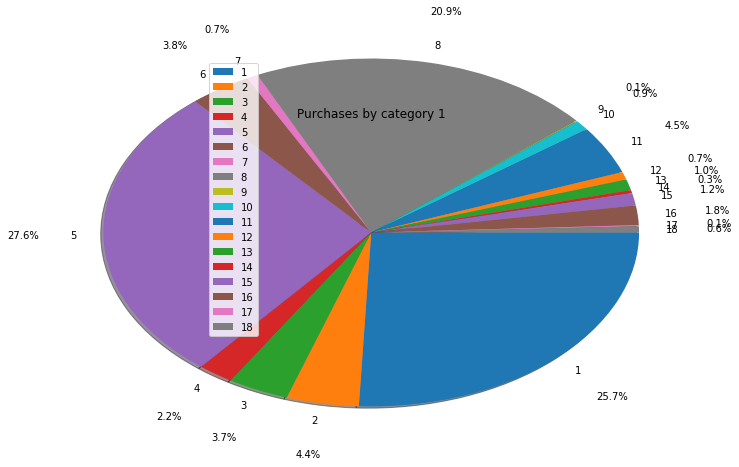

In [19]:
# Plotting pie graph for product catagory 1 count
plt.pie(prod_cat1_count, labels= prod_cat1_list,autopct='%1.1f%%',radius=2,pctdistance=1.3,labeldistance=1.1,counterclock=False, shadow=True)
plt.title('Purchases by category 1')
plt.legend(prod_cat1_list,loc=3)
plt.savefig('product1_analysis.png')
plt.show()

## Product catagory 2 analysis, to see which item in catagory 2 is more popular

In [20]:
# Calculating Product catagory 2 count per item code
black_friday_cat2_count = black_friday_data.dropna(subset=['Product_Category_2'])
black_friday_cat2_count = black_friday_cat2_count['Product_Category_2'].value_counts()
black_friday_cat2_sorted = black_friday_cat2_count.sort_index().reset_index()
print(black_friday_cat2_sorted)
prod_cat2_list = black_friday_cat2_sorted['index']
prod_cat2_count = black_friday_cat2_sorted['Product_Category_2']

    index  Product_Category_2
0     2.0               48481
1     3.0                2835
2     4.0               25225
3     5.0               25874
4     6.0               16251
5     7.0                 615
6     8.0               63058
7     9.0                5591
8    10.0                2991
9    11.0               13945
10   12.0                5419
11   13.0               10369
12   14.0               54158
13   15.0               37317
14   16.0               42602
15   17.0               13130
16   18.0                2730


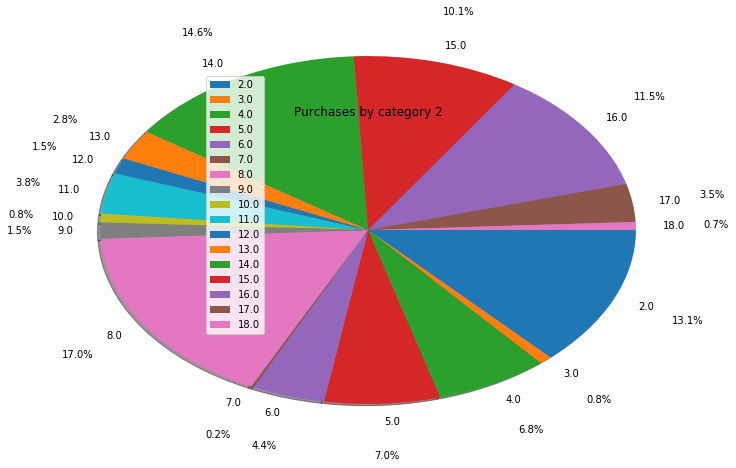

In [21]:
# Plotting pie graph for product catagory 2 count
plt.pie(prod_cat2_count, labels= prod_cat2_list,autopct='%1.1f%%',radius=2,pctdistance=1.3,labeldistance=1.1,counterclock=False, shadow=True)
plt.title('Purchases by category 2')
plt.legend(prod_cat2_list,loc=3)
plt.savefig('product2_analysis.png')
plt.show()

## Product catagory 3 analysis, to see which item in catagory 3 is more popular

In [22]:
# Calculating Product catagory 3 count per item code
black_friday_cat3_count = black_friday_data.dropna(subset=['Product_Category_3'])
black_friday_cat3_count = black_friday_cat3_count['Product_Category_3'].value_counts()
black_friday_cat3_sorted = black_friday_cat3_count.sort_index().reset_index()
print(black_friday_cat3_sorted)
prod_cat3_list = black_friday_cat3_sorted['index']
prod_cat3_count = black_friday_cat3_sorted['Product_Category_3']

    index  Product_Category_3
0     3.0                 600
1     4.0                1840
2     5.0               16380
3     6.0                4818
4     8.0               12384
5     9.0               11414
6    10.0                1698
7    11.0                1773
8    12.0                9094
9    13.0                5385
10   14.0               18121
11   15.0               27611
12   16.0               32148
13   17.0               16449
14   18.0                4563


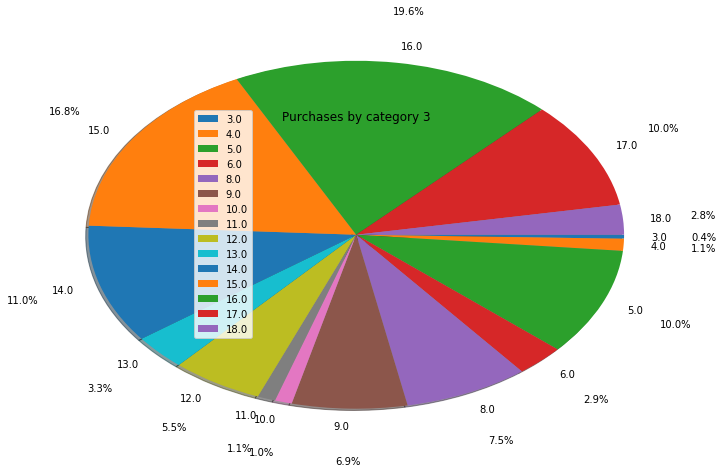

In [23]:
# Plotting pie graph for product catagory 3 count
plt.pie(prod_cat3_count, labels= prod_cat3_list,autopct='%1.1f%%',radius=2,pctdistance=1.3,labeldistance=1.1,counterclock=False, shadow=True)
plt.title('Purchases by category 3')
plt.legend(prod_cat3_list,loc=3)
plt.savefig('product3_analysis.png')
plt.show()